# Lab 6: Factor Analysis

 <h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

 <h2 style="text-align: center;">Registration number: 2448040 </h2>

## Importing libraries:

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis, PCA

## Loading the dataset:

In [100]:
df=pd.read_csv("D:/food-texture.csv")
df.head()

,Unnamed: 0,Oil,Density,Crispy,Fracture,Hardness
0,B110,16.5,2955,10,23,97
1,B136,17.7,2660,14,9,139
2,B171,16.2,2870,12,17,143
3,B192,16.7,2920,10,31,95
4,B225,16.3,2975,11,26,143


## Some basic tasks:

In [101]:
 df = df.drop(columns=['Unnamed: 0']) #Because this column is of no use

In [102]:
 df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Oil       50 non-null     float64
 1   Density   50 non-null     int64  
 2   Crispy    50 non-null     int64  
 3   Fracture  50 non-null     int64  
 4   Hardness  50 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 2.1 KB


In [103]:
df.describe()

,Oil,Density,Crispy,Fracture,Hardness
count,50.000000,50.00000,50.000000,50.000000,50.000000
mean,17.202000,2857.60000,11.520000,20.860000,128.180000
std,1.592007,124.49998,1.775571,5.466073,31.127578
min,13.700000,2570.00000,7.000000,9.000000,63.000000
25%,16.300000,2772.50000,10.000000,17.000000,107.250000
50%,16.900000,2867.50000,12.000000,21.000000,126.000000
75%,18.100000,2945.00000,13.000000,25.000000,143.750000
max,21.200000,3125.00000,15.000000,33.000000,192.000000


<b>Interpretation</b>: <br>
    The dataset consists of 50 observations for Oil, Density, Crispy, Fracture, and Hardness. Oil content averages 17.2% (range: 13.7–21.2), while Density is around 2857.6 with low variability. Crispy scores range from 7 to 15, showing consistency. Fracture (9–33) and Hardness (63–192) have higher variation, indicating differences in texture. Hardness has the widest spread, suggesting varying product firmness. Fracture and Hardness may be correlated, affecting crispiness perception.

In [104]:
 # Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Oil         0
Density     0
Crispy      0
Fracture    0
Hardness    0
dtype: int64


<b>Interpretation</b>:<br>
    There are no missing values in the dataset.

## Factor Analysis tasks:

In [105]:
# Standardizing the data (Factor Analysis assumes standardized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

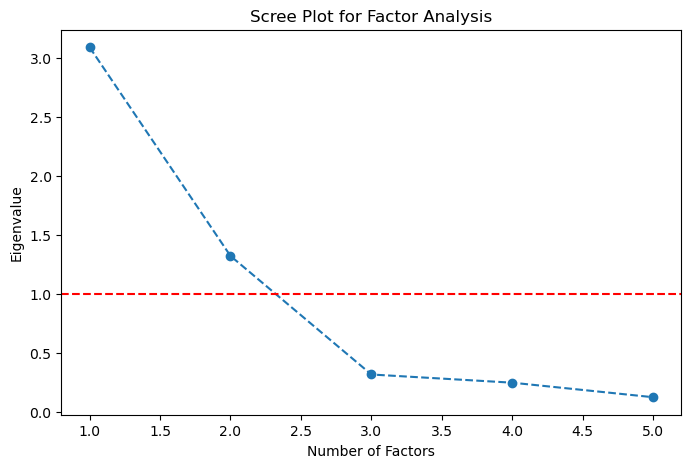

Optimal number of factors based on Kaiser Criterion: 2


In [106]:
# Determine the optimal number of factors using Kaiser Criterion 
              # and Scree Plot
pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', 
         linestyle='--')
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot for Factor Analysis")
plt.axhline(y=1, color='red', linestyle='--')  # Kaiser Criterion 
plt.show()
# Select number of factors where eigenvalues > 1
optimal_factors = np.sum(eigenvalues > 1)
print(f"Optimal number of factors based on Kaiser Criterion: {optimal_factors}")

<b>Kaiser Criterion:</b> <br>
  • States that only factors with eigenvalues > 1 should be retained in Factor Analysis or PCA.<br>
  • An eigenvalue represents the variance explained by a factor. If it's greater than 1, the factor explains more variance than a single original variable, making it useful.<br>
  Here we would count the number of eigenvalues > 1 to determine the optimal number of factors: <br>
     • Scree Plot (graph of eigenvalues vs. the number of factors) identifies the "elbow point"—where eigenvalues drop sharply and level off. The number of factors before this sharp drop is considered optimal, as they explain the most variance.<br>
     • Here first Principal Component Analysis (PCA) is performed on a scaled dataset (df_scaled) to determine the eigenvalues of the factors.<br>
     • A scree plot is generated, showing eigenvalues for each factor.<br>
     • The Kaiser Criterion is applied by marking a red reference line at eigenvalue = 1.<br>
     • Optimal number of factors is selected where eigenvalues > 1. <br>

<b>Key Interpretations from the Scree Plot:</b> <br>
 • Eigenvalues represent the variance explained by each factor. <br>
 • Factors with eigenvalues > 1 are considered significant (Kaiser Criterion). Here, two factors have eigenvalues greater than 1, meaning we should retain two factors. <br>
 • The “elbow point” in the scree plot confirms this selection. <br>
 • After Factor 2, the eigenvalues drop significantly, indicating diminishing explanatory power of additional factors. <br>
 • The red dashed line at eigenvalue = 1 helps visualize the cut-off point.<br>
<b>Conclusion:</b> <br>
  This the optimal number of factors for this dataset is 2, as they explain most of the variance while avoiding unnecessary complexity.Additional factors contribute very little 
variance and can be ignored.

In [107]:
# Perform Factor Analysis with the optimal number of factors
fa = FactorAnalysis(n_components=optimal_factors, random_state=42)
factors = fa.fit_transform(df_scaled)
# Get factor loadings (how much each variable contributes to each factor)
factor_loadings = pd.DataFrame(fa.components_, columns=df.columns)
# Display factor loadings
print("\nFactor Loadings:")
print(factor_loadings)


Factor Loadings:
        Oil   Density    Crispy  Fracture  Hardness
0 -0.688660  0.771513 -0.957506  0.855834 -0.319668
1  0.441448 -0.494242 -0.142683  0.155682 -0.717508


Factor loadings represent the correlation between each original variable and the extracted factors. They help us understand how strongly each variable contributes to a factor. <br>
If a variable has a high positive or negative value in a factor, it is strongly related to it. 

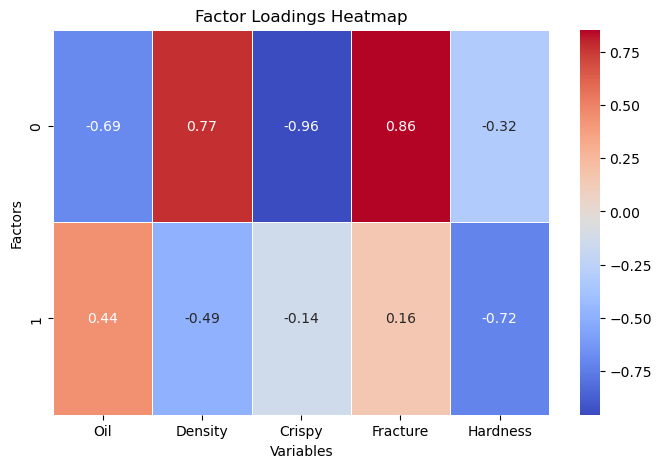

In [108]:
# Factor Loadings Heatmap
# Heatmap of Factor Loadings
plt.figure(figsize=(8, 5))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5)
plt.title("Factor Loadings Heatmap")
plt.xlabel("Variables")
plt.ylabel("Factors")
plt.show()

<b>Factor 1 (Row 0) Interpretation:</b> <br>
 • Density (0.77) and Fracture (0.85) have strong positive loadings → Factor 1 represents characteristics related to the compactness and breaking strength of the food. <br>
 • Oil (-0.69) and Crispy (-0.96) have strong negative loadings → High oil content is associated with lower crispiness, meaning crispier foods tend to have less oil. <br>
 • Hardness (-0.32) has a weak negative loading, meaning it has a minor inverse effect on this factor. <br>
 <br>
 Factor 1 can be interpreted as "Texture & Crispiness"—Foods that are dense and fracture easily are crispier and have lower oil content.<br>
 <br>
<b>Factor 2 (Row 1) Interpretation:</b> <br>
 • Oil (0.44) and Density (-0.49) have moderate loadings → This factor might represent the trade-off between oil content and density. <br>
 • Hardness (-0.72) has a strong negative loading → This suggests that harder foods tend to have lower values for this factor. <br>
 • Crispy (-0.14) and Fracture (0.16) have very small contributions, meaning they don’t strongly define this factor. <br>
 <br>
 Factor 2 can be interpreted as "Oil Content & Hardness"—Foods with higher oil content tend to be softer, while denser foods are harder.<br>
 <br>
 Thus in a nutshell: <br>
 • Factor 1 differentiates between crispy and dense food items. <br>
 • Factor 2 captures the relationship between oil content and hardness. <br>
 • Together, these factors reduce dimensionality while still capturing key variations in food texture. <br>

In [109]:
# Convert factor scores to DataFrame
factor_columns = [f"Factor_{i+1}" for i in range(optimal_factors)]
factors_df = pd.DataFrame(factors, columns=factor_columns)
print("\nFactor Scores for Each Observation:")
print(factors_df.head())


Factor Scores for Each Observation:
   Factor_1  Factor_2
0  0.837971  0.218817
1 -1.578198  0.026014
2 -0.218971 -0.642051
3  0.991308  0.652029
4  0.552791 -0.681658


 Factor scores represent how each individual observation (row) scores on the extracted factors. They help us understand which food samples exhibit specific characteristics.

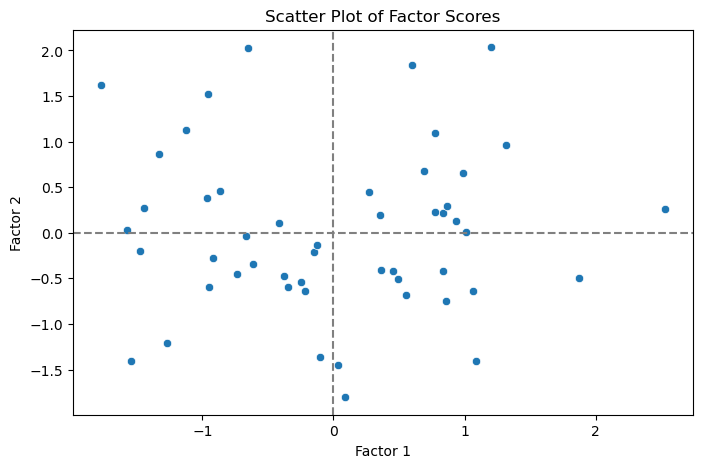

In [110]:
# Scatter Plot of Factor Scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x=factors_df['Factor_1'], y=factors_df['Factor_2'])
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Scatter Plot of Factor Scores")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

This scatter plot represents the factor scores obtained from Factor Analysis on your dataset. Each point corresponds to an observation (sample), and the coordinates of the points represent the values 
of Factor 1 (X-axis) and Factor 2 (Y-axis). <br>
<b>Key Interpretations: </b>
 • Top Right (+, +) → High Factor 1 & High Factor 2 These samples are high in both characteristics represented by Factor 1 and Factor 2. <br>
 • Top Left (-, +) → Low Factor 1 & High Factor 2 These samples score low on Factor 1 but high on Factor 2. <br>
 • Bottom Right (+, -) → High Factor 1 & Low Factor 2 These samples score high on Factor 1 but low on Factor 2. <br>
 • Bottom Left (-, -) → Low Factor 1 & Low Factor 2 These samples score low on both factors. <br>
 <br>
<b>This Plot Shows:</b>
 • The spread of the points shows how the samples differ across the two factors. <br>
 • The center (0,0) represents samples that are neutral or have average values on both factors. <br>
 • The diversity in scores suggests that Factor Analysis successfully captured different characteristics in the data. <br>
 <br>
Factor 1 and Factor 2 Represent Food Properties:(Factor 1 is crispiness & density and Factor 2 is oiliness & softness, based on previous interpretations.) <br>
 • Samples on the right (+ve Factor 1) → Crispier & denser foods. <br>
 • Samples on the left (-ve Factor 1) → Softer, less crispy foods. <br>
 • Samples on the top (+ve Factor 2) → Oily & soft foods. <br>
 • Samples on the bottom (-ve Factor 2) → Hard foods with low oil content.

In [111]:
explained_variance = np.sum(eigenvalues[:optimal_factors]) / np.sum(eigenvalues)
print(f"Explained Variance by {optimal_factors} factors: {explained_variance:.4f}")

Explained Variance by 2 factors: 0.8654


<b> Interpretation </b>: <br>
We can conclude that 86.25% variance is captured by the two factors.